
Predicciones para México

 Analisamos los nacimientos por años de cada estado de México, desarrollamos una modelo que nos permite calcular el numero de nacimientos que abra para años proximos año, por estados.



### Comenzamos cargando los datos 


In [31]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


data=pd.read_csv('Natalidad_Mexico.csv')


In [32]:
data

,estado,Total,Hombres,Mujeres,No especificado,year,Unnamed: 6
0,Aguascalientes,26583,13603,12980,0,2010,NaN
1,Baja California,63559,32264,31295,0,2010,NaN
2,Baja California Sur,13988,7076,6912,0,2010,NaN
3,Campeche,20380,10230,10150,0,2010,NaN
4,Coahuila de Zaragoza,56972,28879,28093,0,2010,NaN
...,...,...,...,...,...,...,...
292,Tlaxcala,24842,12474,12368,0,2018,NaN
293,Veracruz de Ignacio de la Llave,124673,63218,61455,0,2018,NaN
294,Yucatán,35158,17996,17162,0,2018,NaN
295,Zacatecas,33098,16748,16350,0,2018,NaN


In [33]:
# cantidad de extranjeros por estado
data = data.rename(columns={"No especificado": "Extranjeros por estado"})


In [34]:
data

,estado,Total,Hombres,Mujeres,Extranjeros por estado,year,Unnamed: 6
0,Aguascalientes,26583,13603,12980,0,2010,NaN
1,Baja California,63559,32264,31295,0,2010,NaN
2,Baja California Sur,13988,7076,6912,0,2010,NaN
3,Campeche,20380,10230,10150,0,2010,NaN
4,Coahuila de Zaragoza,56972,28879,28093,0,2010,NaN
...,...,...,...,...,...,...,...
292,Tlaxcala,24842,12474,12368,0,2018,NaN
293,Veracruz de Ignacio de la Llave,124673,63218,61455,0,2018,NaN
294,Yucatán,35158,17996,17162,0,2018,NaN
295,Zacatecas,33098,16748,16350,0,2018,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   estado                  297 non-null    object 
 1   Total                   297 non-null    int64  
 2   Hombres                 297 non-null    int64  
 3   Mujeres                 297 non-null    int64  
 4   Extranjeros por estado  297 non-null    int64  
 5   year                    297 non-null    int64  
 6   Unnamed: 6              0 non-null      float64
dtypes: float64(1), int64(5), object(1)
memory usage: 16.4+ KB


In [36]:
data.drop(columns="Unnamed: 6")

,estado,Total,Hombres,Mujeres,Extranjeros por estado,year
0,Aguascalientes,26583,13603,12980,0,2010
1,Baja California,63559,32264,31295,0,2010
2,Baja California Sur,13988,7076,6912,0,2010
3,Campeche,20380,10230,10150,0,2010
4,Coahuila de Zaragoza,56972,28879,28093,0,2010
...,...,...,...,...,...,...
292,Tlaxcala,24842,12474,12368,0,2018
293,Veracruz de Ignacio de la Llave,124673,63218,61455,0,2018
294,Yucatán,35158,17996,17162,0,2018
295,Zacatecas,33098,16748,16350,0,2018


### Correlacion y multicolinealidad


In [37]:
df = pd.get_dummies(data , columns=["estado"], dtype= int)

In [38]:
data = pd.DataFrame(data, columns=["estado", "Total", "Hombres", "Mujeres", "year", "Extranjeros por estado"])

In [39]:
df2 = data.copy()

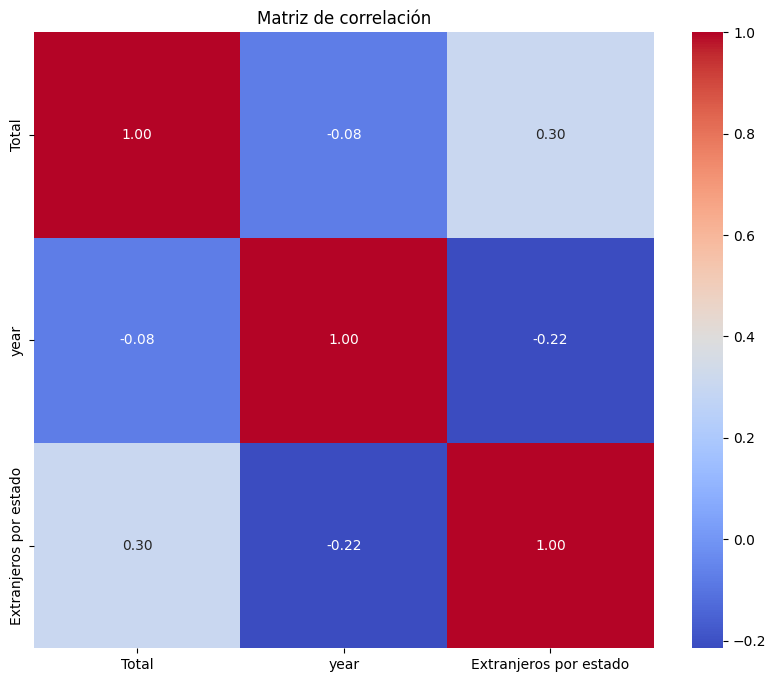

In [40]:
columnas = ["Total",  "year", "Extranjeros por estado"]
correlation_matrix = df2[columnas].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))  # ajusta tamaño si quieres
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [41]:
df.columns

Index(['Total', 'Hombres', 'Mujeres', 'Extranjeros por estado', 'year',
       'Unnamed: 6', 'estado_Aguascalientes', 'estado_Baja California',
       'estado_Baja California Sur', 'estado_Campeche', 'estado_Chiapas',
       'estado_Chihuahua', 'estado_Ciudad de México',
       'estado_Coahuila de Zaragoza', 'estado_Colima', 'estado_Durango',
       'estado_Extranjero', 'estado_Guanajuato', 'estado_Guerrero',
       'estado_Hidalgo', 'estado_Jalisco', 'estado_Michoacán de Ocampo',
       'estado_Morelos', 'estado_México', 'estado_Nayarit',
       'estado_Nuevo León', 'estado_Oaxaca', 'estado_Puebla',
       'estado_Querétaro', 'estado_Quintana Roo', 'estado_San Luis Potosí',
       'estado_Sinaloa', 'estado_Sonora', 'estado_Tabasco',
       'estado_Tamaulipas', 'estado_Tlaxcala',
       'estado_Veracruz de Ignacio de la Llave', 'estado_Yucatán',
       'estado_Zacatecas'],
      dtype='object')

In [42]:
df

,Total,Hombres,Mujeres,Extranjeros por estado,year,Unnamed: 6,estado_Aguascalientes,estado_Baja California,estado_Baja California Sur,estado_Campeche,...,estado_Quintana Roo,estado_San Luis Potosí,estado_Sinaloa,estado_Sonora,estado_Tabasco,estado_Tamaulipas,estado_Tlaxcala,estado_Veracruz de Ignacio de la Llave,estado_Yucatán,estado_Zacatecas
0,26583,13603,12980,0,2010,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63559,32264,31295,0,2010,NaN,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13988,7076,6912,0,2010,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,20380,10230,10150,0,2010,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,56972,28879,28093,0,2010,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,24842,12474,12368,0,2018,NaN,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
293,124673,63218,61455,0,2018,NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
294,35158,17996,17162,0,2018,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
295,33098,16748,16350,0,2018,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
cols = ['Total', 'year', 'Extranjeros por estado',
       'estado_Aguascalientes', 'estado_Baja California',
       'estado_Baja California Sur', 'estado_Campeche', 'estado_Chiapas',
       'estado_Chihuahua', 'estado_Ciudad de México',
       'estado_Coahuila de Zaragoza', 'estado_Colima', 'estado_Durango',
       'estado_Extranjero', 'estado_Guanajuato', 'estado_Guerrero',
       'estado_Hidalgo', 'estado_Jalisco', 'estado_Michoacán de Ocampo',
       'estado_Morelos', 'estado_México', 'estado_Nayarit',
       'estado_Nuevo León', 'estado_Oaxaca', 'estado_Puebla',
       'estado_Querétaro', 'estado_Quintana Roo', 'estado_San Luis Potosí',
       'estado_Sinaloa', 'estado_Sonora', 'estado_Tabasco',
       'estado_Tamaulipas', 'estado_Tlaxcala',
       'estado_Veracruz de Ignacio de la Llave', 'estado_Yucatán',
       'estado_Zacatecas']
correlation_matrix = df[cols].corr()

#correlation_matrix = data[cols].corr()


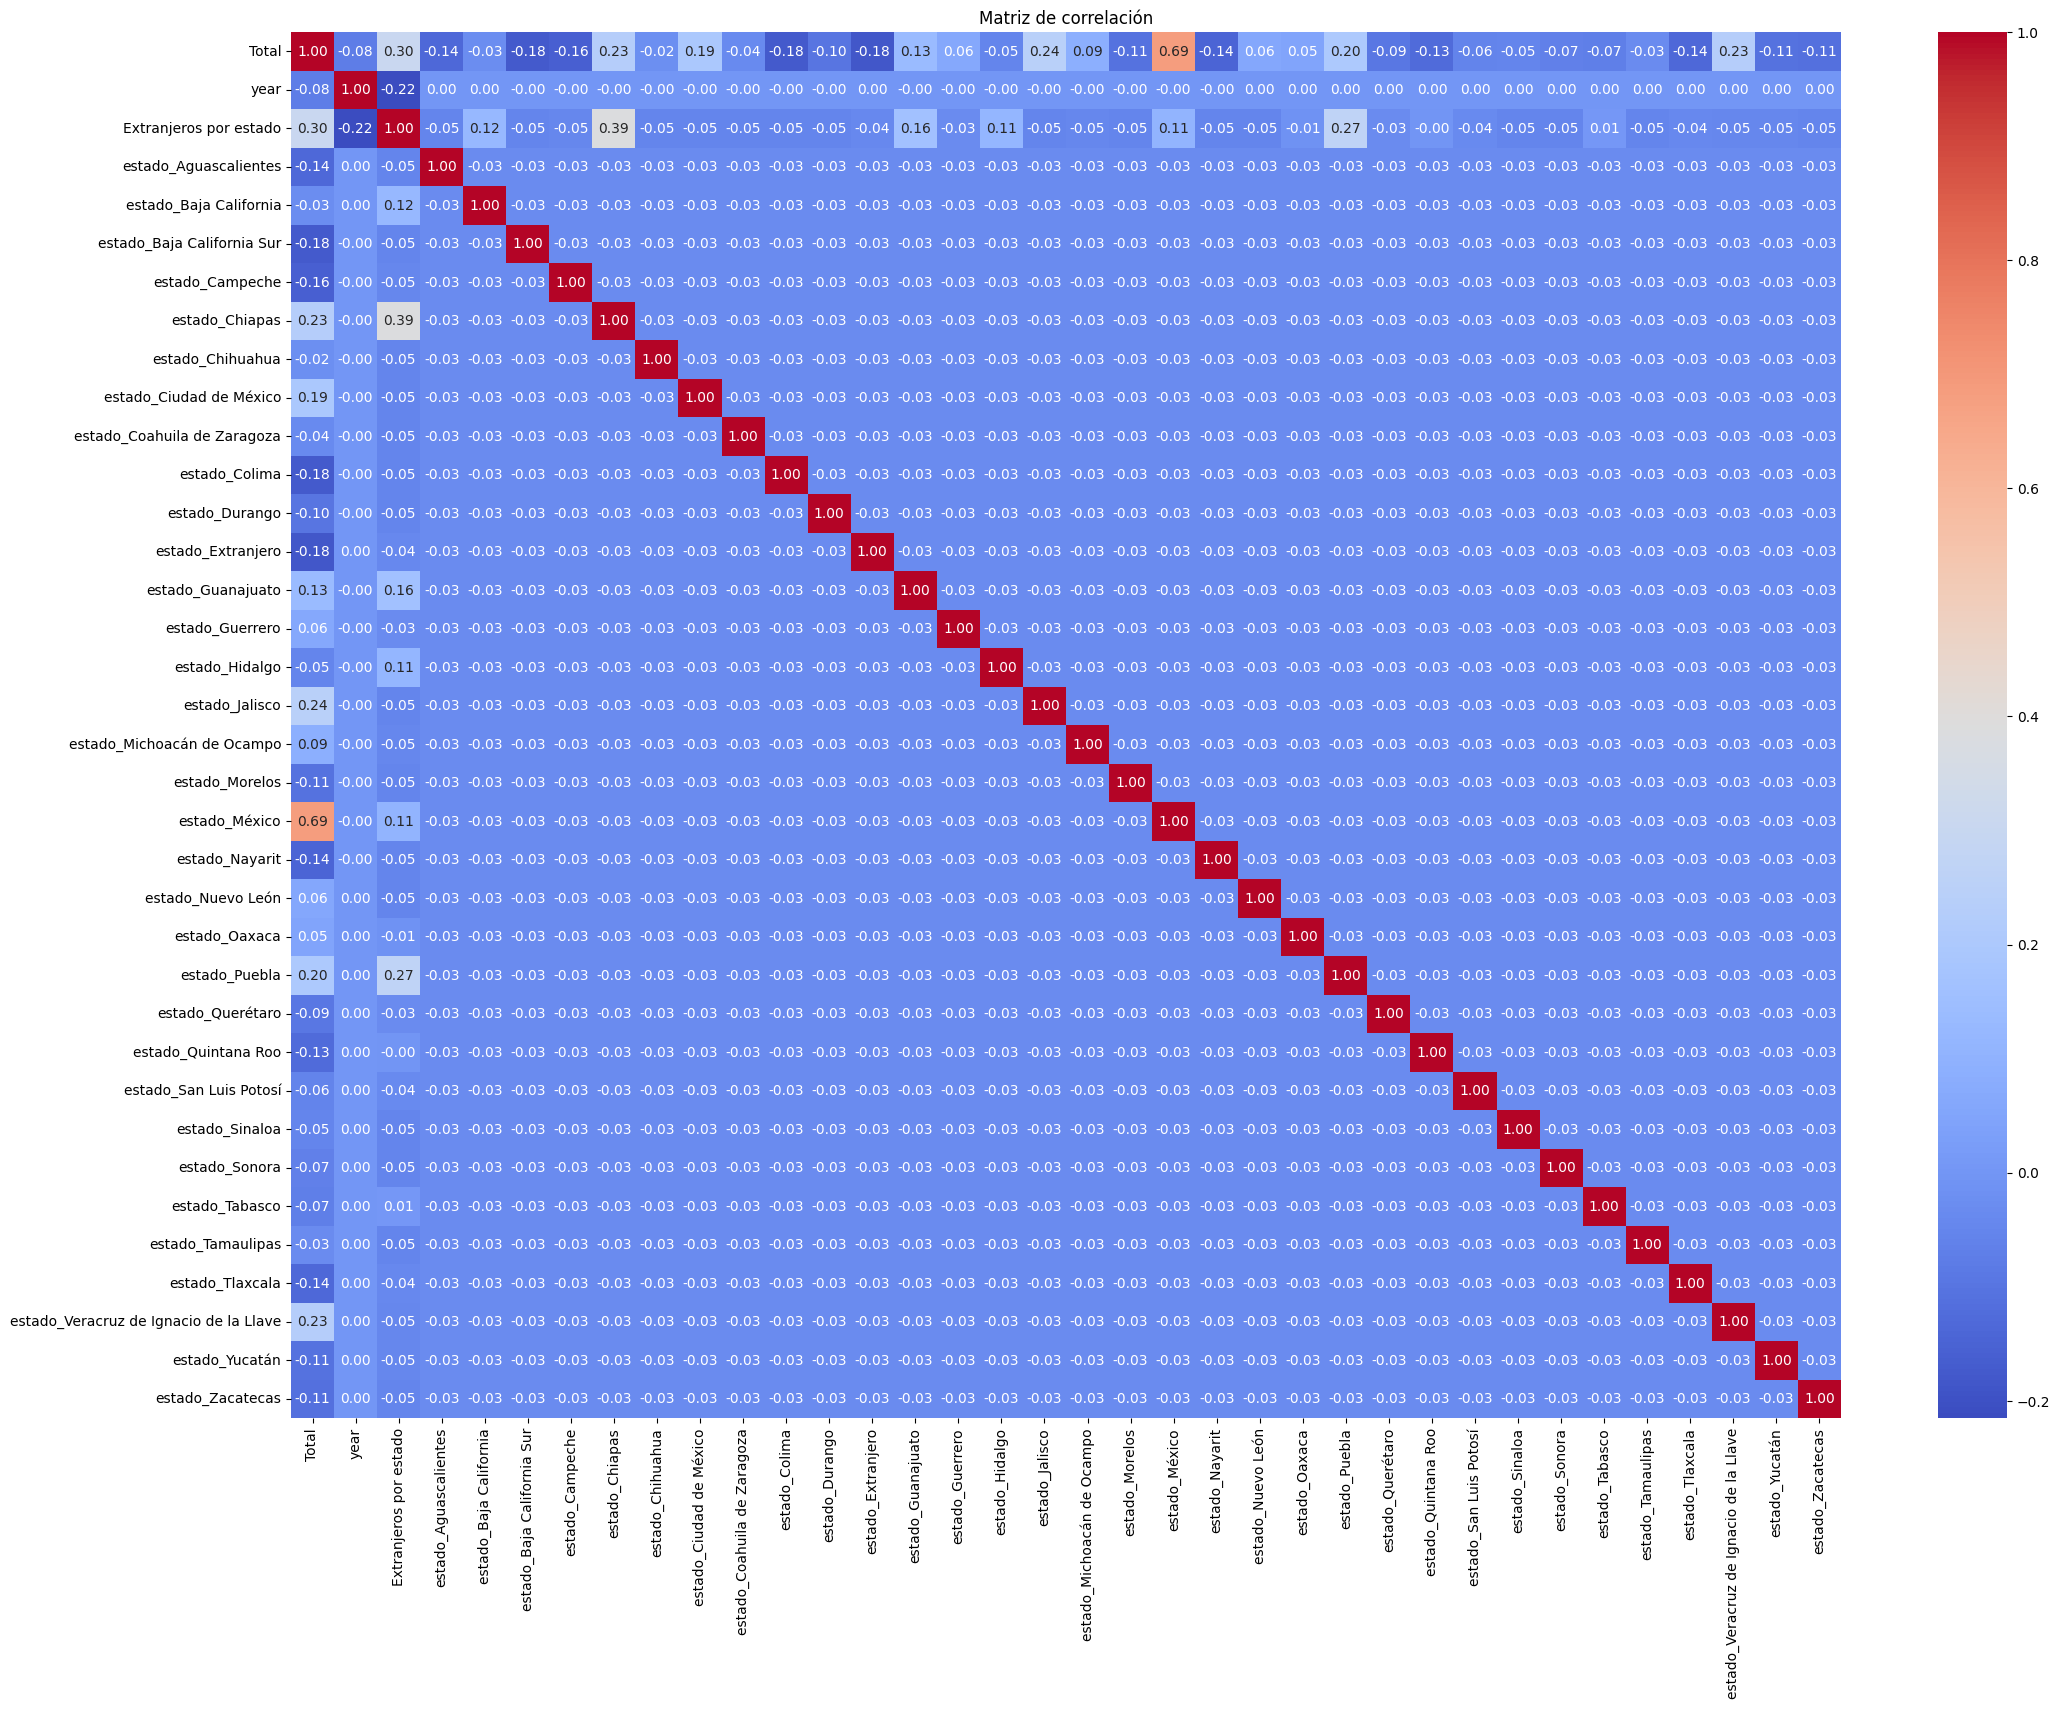

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 18))  # ajusta tamaño si quieres
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

In [45]:
 #Cantidad de personas en total, hombre y mujer. Por estado

<Axes: xlabel='estado', ylabel='Total'>

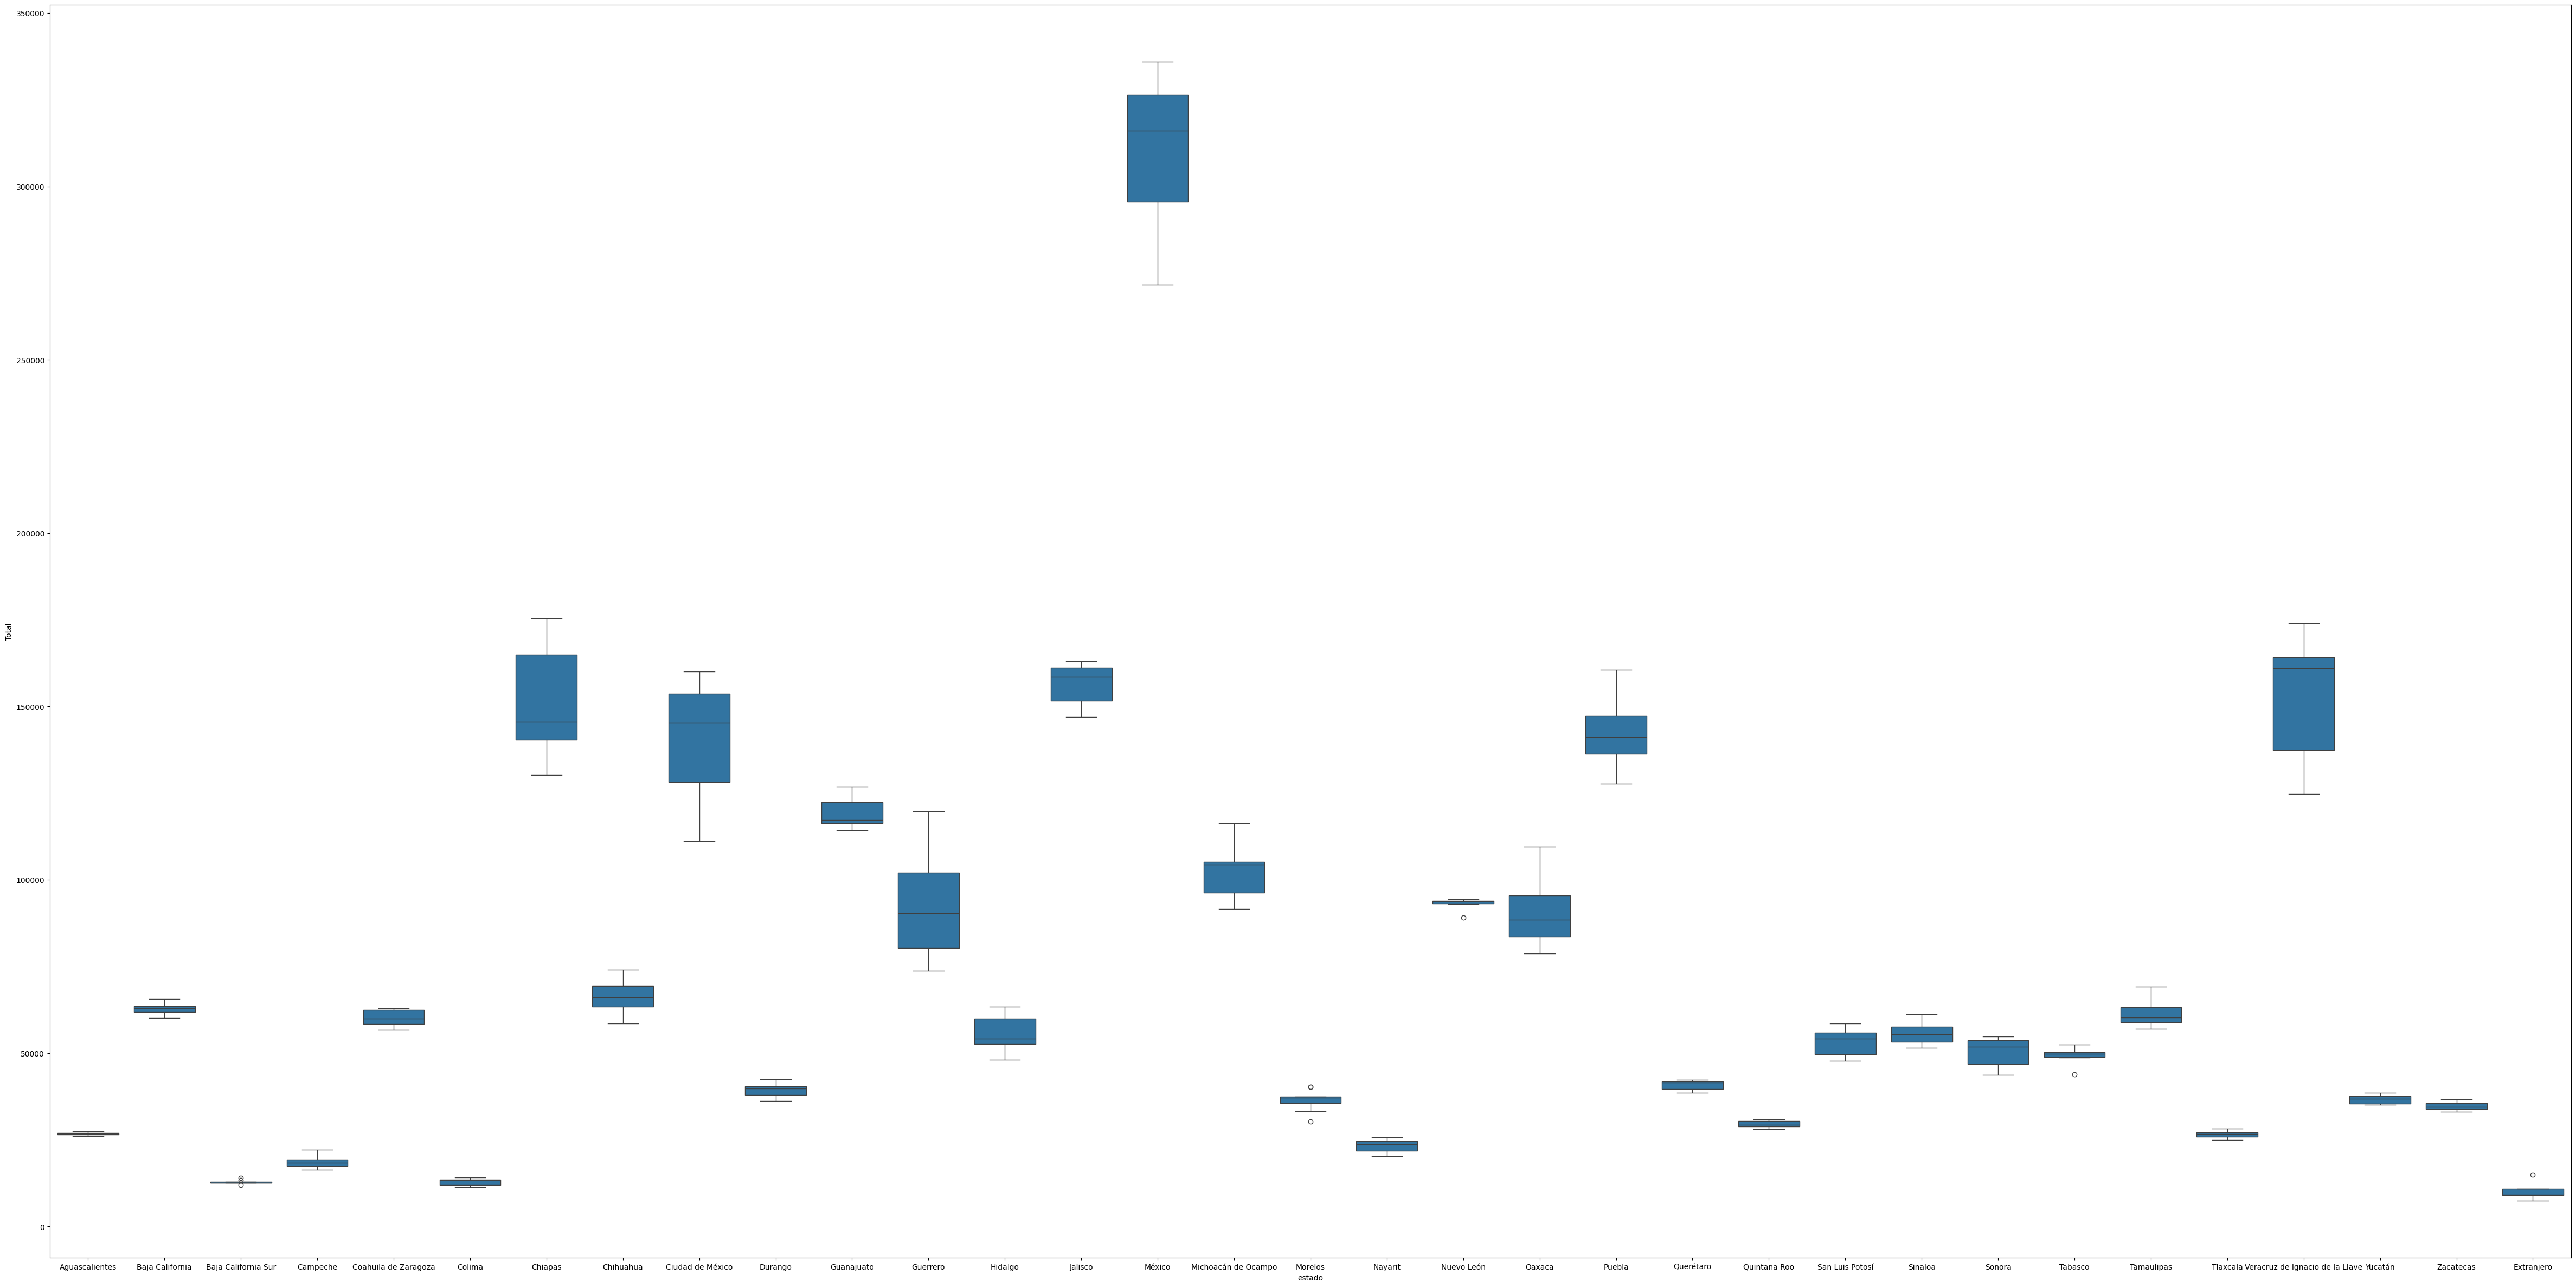

In [46]:
plt.figure(figsize=(60,30))
sns.boxplot(x='estado', y='Total', data=df2)

# Observaciones

+ Estados con una una poca variacianza son estados que tienen una poca poblacion.
+ Estados con una una variacion media son estados donde hay mediana cantidad de poblacion.
+ Estados con una una mucha varianza son estados donde hay mediana alta cantidad de poblacion, como el estado de mexico.


Continuaremos intentanto determinar los factores que determian una mayor poblacion.

In [47]:
data.estado.unique()
data[data.estado=='Ciudad de México']

,estado,Total,Hombres,Mujeres,year,Extranjeros por estado
8,Ciudad de México,160057,79504,80551,2010,2
41,Ciudad de México,156549,77907,78642,2011,0
74,Ciudad de México,153631,76502,77129,2012,0
107,Ciudad de México,145302,73312,71990,2013,0
140,Ciudad de México,145609,73346,72263,2014,0
173,Ciudad de México,135828,68367,67461,2015,0
206,Ciudad de México,128227,64727,63500,2016,0
239,Ciudad de México,119227,60321,58906,2017,0
272,Ciudad de México,111130,56169,54961,2018,0


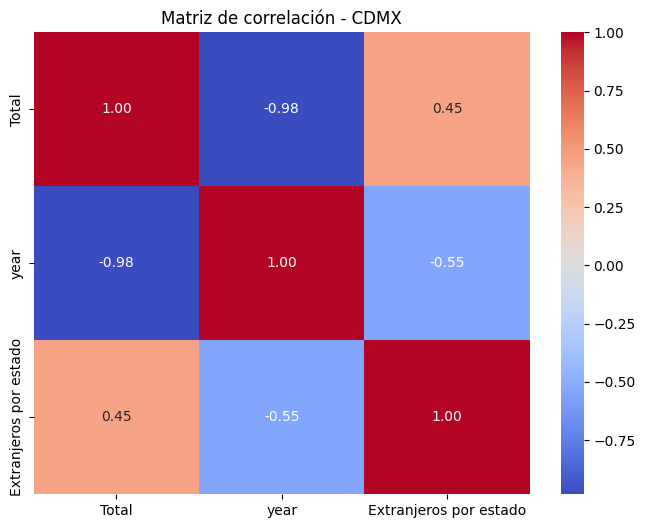

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
cdmx= data[data["estado"] == "Ciudad de México"]
# Paso 1: Selecciona las columnas numéricas que quieres correlacionar
columnas = ["Total", "year", "Extranjeros por estado"]
matriz_corr = cdmx[columnas].corr()

# Paso 2: Dibuja la matriz con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación - CDMX")
plt.show()


In [49]:
print(cdmx.shape)
print(cdmx.head())

(9, 6)
               estado   Total  Hombres  Mujeres  year  Extranjeros por estado
8    Ciudad de México  160057    79504    80551  2010                       2
41   Ciudad de México  156549    77907    78642  2011                       0
74   Ciudad de México  153631    76502    77129  2012                       0
107  Ciudad de México  145302    73312    71990  2013                       0
140  Ciudad de México  145609    73346    72263  2014                       0


In [50]:
matriz_corr

,Total,year,Extranjeros por estado
Total,1.000000,-0.981930,0.450563
year,-0.981930,1.000000,-0.547723
Extranjeros por estado,0.450563,-0.547723,1.000000


# Observaciones

Analizando los datos por su clase estado y con el metodo de correlacion , encontramos que existe una fuerte relacion inversa entre el numero de personas y el año
es decir que conforme avanzamos en el tiempo la cantidad de nacimientos se ha reducido, En el estado de mexico.

Se propone determinar la tendencia mediante las diversas tecnicas de regresion lineal o logaritmica para realizar predicciones dde aqui a 10 años.

 Grafico de dispersion 

Text(0, 0.5, 'Numero de nacimientos')

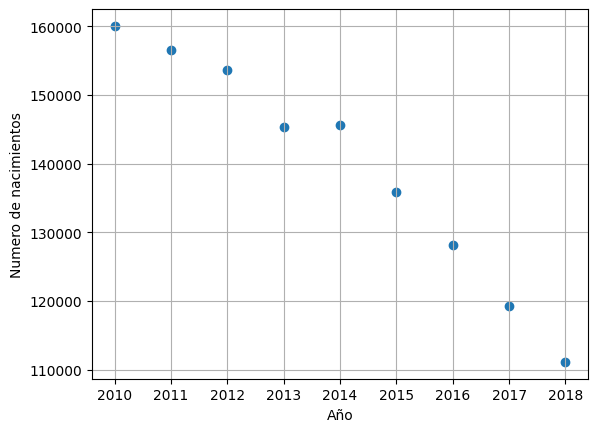

In [51]:
# Graficamos el total, y los sexos
plt.scatter(cdmx.year, cdmx.Total)
plt.grid()
plt.xlabel('Año')
plt.ylabel('Numero de nacimientos')

Text(0, 0.5, 'Numero de nacimientos')

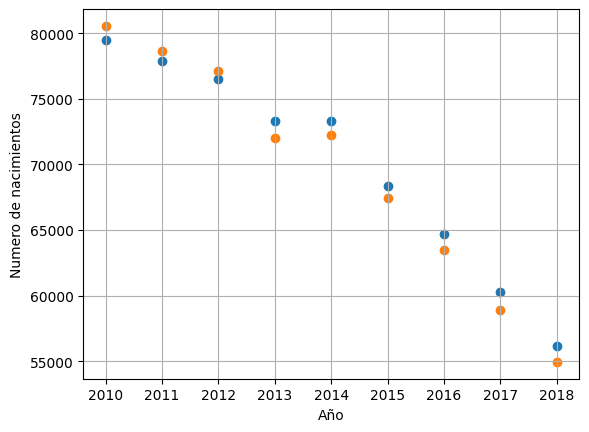

In [52]:
plt.scatter(cdmx.year, cdmx.Hombres)
plt.scatter(cdmx.year, cdmx.Mujeres)
plt.grid()
plt.xlabel('Año')
plt.ylabel('Numero de nacimientos')

Este grafico debajo es el que nos interersa mas

Text(0, 0.5, 'Numero de nacimientos')

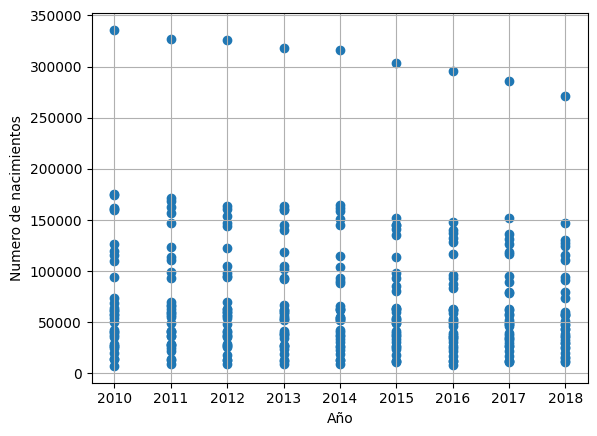

In [53]:
# Graficamos el total, y los sexos
plt.scatter(data["year"], data["Total"])
plt.grid()
plt.xlabel('Año')
plt.ylabel('Numero de nacimientos')

Por que queremos predecir el numero de nacimientos pos estado en los proximos años


## Creacion de modelo para la estimacion de nacimientos por estado en los proximos años 


In [54]:
df.drop('Unnamed: 6', axis=1, inplace=True)


In [55]:
df.columns

Index(['Total', 'Hombres', 'Mujeres', 'Extranjeros por estado', 'year',
       'estado_Aguascalientes', 'estado_Baja California',
       'estado_Baja California Sur', 'estado_Campeche', 'estado_Chiapas',
       'estado_Chihuahua', 'estado_Ciudad de México',
       'estado_Coahuila de Zaragoza', 'estado_Colima', 'estado_Durango',
       'estado_Extranjero', 'estado_Guanajuato', 'estado_Guerrero',
       'estado_Hidalgo', 'estado_Jalisco', 'estado_Michoacán de Ocampo',
       'estado_Morelos', 'estado_México', 'estado_Nayarit',
       'estado_Nuevo León', 'estado_Oaxaca', 'estado_Puebla',
       'estado_Querétaro', 'estado_Quintana Roo', 'estado_San Luis Potosí',
       'estado_Sinaloa', 'estado_Sonora', 'estado_Tabasco',
       'estado_Tamaulipas', 'estado_Tlaxcala',
       'estado_Veracruz de Ignacio de la Llave', 'estado_Yucatán',
       'estado_Zacatecas'],
      dtype='object')

In [56]:
import pandas as pd
import statsmodels.api as sm

X = df.drop(columns=["Total", "Hombres", "Mujeres","Extranjeros por estado"])  # Dejas fuera las variables objetivo
X = sm.add_constant(X)  # Agrega el intercepto
y = df["Total"]


modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     810.6
Date:                Sun, 08 Jun 2025   Prob (F-statistic):          8.77e-245
Time:                        10:51:32   Log-Likelihood:                -3005.0
No. Observations:                 297   AIC:                             6078.
Df Residuals:                     263   BIC:                             6204.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------

0       33798.369697
1       69941.369697
2       19882.480808
3       25736.480808
4       67240.703030
           ...      
292     19414.519192
293    144707.408081
294     29540.963636
295     27606.074747
296      2660.963636
Length: 297, dtype: float64


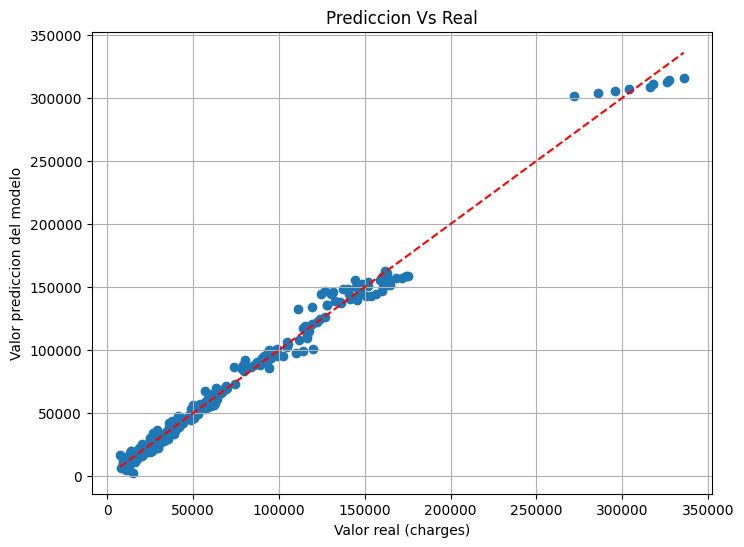

In [57]:
y_pred = modelo.predict(X)
print(y_pred )
#Grafica de dispersion 
plt.figure(figsize=(8,6))
plt.scatter(x=y, y=y_pred)
plt.xlabel("Valor real (charges)")
plt.ylabel("Valor prediccion del modelo")
plt.title("Prediccion Vs Real")
plt.plot([y.min(), y.max()],[y.min(), y.max()], "r--")
plt.grid(True)
plt.show()

In [58]:
df.columns

Index(['Total', 'Hombres', 'Mujeres', 'Extranjeros por estado', 'year',
       'estado_Aguascalientes', 'estado_Baja California',
       'estado_Baja California Sur', 'estado_Campeche', 'estado_Chiapas',
       'estado_Chihuahua', 'estado_Ciudad de México',
       'estado_Coahuila de Zaragoza', 'estado_Colima', 'estado_Durango',
       'estado_Extranjero', 'estado_Guanajuato', 'estado_Guerrero',
       'estado_Hidalgo', 'estado_Jalisco', 'estado_Michoacán de Ocampo',
       'estado_Morelos', 'estado_México', 'estado_Nayarit',
       'estado_Nuevo León', 'estado_Oaxaca', 'estado_Puebla',
       'estado_Querétaro', 'estado_Quintana Roo', 'estado_San Luis Potosí',
       'estado_Sinaloa', 'estado_Sonora', 'estado_Tabasco',
       'estado_Tamaulipas', 'estado_Tlaxcala',
       'estado_Veracruz de Ignacio de la Llave', 'estado_Yucatán',
       'estado_Zacatecas'],
      dtype='object')

# Predicciones

In [59]:
import pandas as pd

# Lista completa de columnas (mismo orden que en el entrenamiento)
columnas = X.columns.tolist()

# Inicializar con ceros
nueva_fila = pd.DataFrame([[0]*len(columnas)], columns=columnas)

# Llenar los valores necesarios
nueva_fila["const"] = 1
nueva_fila["year"] = 2029   # Cambia "year" por el nombre correcto de tu variable de tiempo si no es "year"
nueva_fila["estado_México"] = 1

prediccion = modelo.predict(nueva_fila)
print("Predicción de población total:", prediccion.iloc[0])

Predicción de población total: 282315.8914141143


# Guardar modelo

In [60]:
# Guardar el modelo entrenado
modelo.save('ModeloRegresionlineal_Poblacion_por_estado_en_año.pkl')